In [1]:

import numpy as np
import math


<img src='algo.jpg'>

In [2]:
"""
Some properties :
A - system matrix
B - input matrix
H - measurement model
S - innovation covariance
v - innovation
x - state vector
z_hat - predicted measurement
Sigma - state covariance
x_pred - predicted state
Sigma_pred - predicted state covariance
Q - input noise covariance
R - measurement noise covariance
K - Kalman filter gain
"""

# Created system class, which has system parameters
class system:
    def __init__(self,A,B,H,Q,R,):
        self.A = A
        self.B = B
        self.H = H
        self.Q = Q
        self.R = R
        
# Created initial class, which has location with the uncertainity        
class initial:
    def __init__(self,x,Sigma):
        self.x = x
        self.Sigma = Sigma

# Groundtruth, that is the actual data of path measured using sensors.        
class groundTruth():
    def __init__(self,x,y):
        self.x = x
        self.y = y
    
# Kalman filter class which has methods, prediction and correction        
class kalman_filter:
    
    def __init__(self,system,init):
        self.A = system.A
        self.B = system.B
        self.H = system.H
        self.Q = system.Q
        self.R = system.R
        
        self.x = init.x
        self.Sigma = init.Sigma
              
    def prediction(self): # Prediction method performs the prediction steps
        
        # Predicted state
        self.x_pred = (self.A)@(self.x)  # + self.B@self.u
        # Predicted covariance
        self.Sigma_pred = (self.A)@(self.Sigma)@((self.A).transpose())+self.Q
        # This is an extra step
        self.z_hat = (self.H)@(self.x_pred)
    
    def correction(self,z): # Correction method performs the correction steps
                            # z is the ith measurement
        self.z = z
        # Innovation and measurement residual
        self.v = z - self.z_hat
        # Innovation on covariance
        self.S = (self.H)@(self.Sigma_pred)@((self.H).transpose())+self.R
        # Optimal Kalman gain
        self.K = (self.Sigma_pred)@((self.H).transpose())@(np.linalg.inv(self.S))
        # Updated state estimate
        self.x = self.x_pred + self.K@self.v
        
        # Updated covariance estimate
        I = np.identity(self.x.shape[0])
        # This is in Joseph form. Both lines are corrects
        #self.Sigma = (I - self.K@self.H)@self.Sigma_pred@((I-self.K@self.H).transpose())+self.K@self.R@self.K.transpose()
        self.Sigma = (I - self.K@self.H)@self.Sigma_pred
    

        




In [3]:
# Define the system model and motion model here
A = np.identity(2)
B = np.array([])
H = np.identity(2)
Q = np.identity(2)*10**-3
R = np.identity(2)*5/100
x = np.zeros((2,1))
Sigma = np.identity(2)*2

R = np.diag([0.05,0.05])**2
L = np.linalg.cholesky(R)

# Generating state data
xdata = np.linspace(-5,5,100)
ydata = np.array([math.sin(i)+3 for i in xdata])

gt = groundTruth(xdata,ydata)

# Creating measurements
z = np.zeros((2,100))
for i in range(gt.x.shape[0]):
    noise = L@np.random.rand(2,1)
    z[0,i] = gt.x[i] + noise[0]
    z[1,i] = gt.y[i] + noise[1]

# We created measurement data from the ground truth by adding noise to it
sys = system(A,B,H,Q,R)
init = initial(x,Sigma)

In [4]:
filter = kalman_filter(sys,init) # Created kalman filter object

x = np.zeros((2,100)) # Create array which holds filtered data
# Gave the initial data
x[0,0] = init.x[0]
x[1,0] = init.x[1]

for i in range(100):
    z_temp = np.zeros((2,1))
    z_temp[0] = z[0,i]
    z_temp[1] = z[1,i]
    filter.prediction()
    filter.correction(z_temp)
    x[0,i] = filter.x[0]
    x[1,i] = filter.x[1]
    


In [5]:
import matplotlib.pyplot as plt

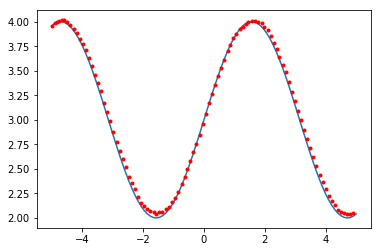

In [6]:
plt.plot(xdata,ydata)
plt.plot(x[0,:],x[1,:],'.',color = 'r')
plt.show()

Comparison of groundtruth and Kalman Filter.<br>
Points in red are from Kalman filter.<br>

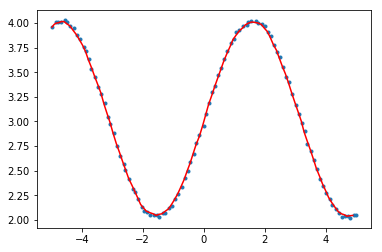

In [7]:
plt.plot(z[0,:],z[1,:],'.')
plt.plot(x[0,:],x[1,:],color='r')

Comparison of actual data and Kalman Filter.<br>
Points in blue are actual data.<br>
Red curve is Kalman filter data.<br>

Useful links
https://dsp.stackexchange.com/questions/23776/kalman-filter-understanding-the-noise-covariance-matrix